# Crawling - kakao stock

In [1]:
code = '035720'  # kakao
code

'035720'

In [2]:
import requests
url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
res = requests.get(url, headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36'})
res.encoding = 'utf-8'
res.status_code

200

In [3]:
url

'http://finance.naver.com/item/sise_day.nhn?code=035720'

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [5]:
el_table_navi = soup.find("table", class_="Nnavi")
el_td_last = el_table_navi.find("td", class_="pgRR")
pg_last = el_td_last.a.get('href').rsplit('&')[1]
pg_last = pg_last.split('=')[1]
pg_last = int(pg_last)
pg_last

542

In [6]:
import traceback
import pandas as pd

def parse_page(code, page):
    try:
        url = 'http://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
        res = requests.get(url, headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36'})
        _soap = BeautifulSoup(res.text, 'lxml')
        _kakao = pd.read_html(str(_soap.find("table")), header=0)[0]
        _kakao = _kakao.dropna()
        return _kakao
    except Exception as e:
        traceback.print_exc()
    return None

In [7]:
import datetime
str_datefrom = datetime.datetime.strftime(datetime.datetime(year=2019, month=1, day=1), '%Y.%m.%d')
str_datefrom

'2019.01.01'

In [8]:
str_dateto = datetime.datetime.strftime(datetime.datetime.today(), '%Y.%m.%d')
str_dateto

'2021.12.10'

In [9]:
kakao = None
for page in range(1, pg_last+1):
    _kakao = parse_page(code, page)
    _kakao_filtered = _kakao[_kakao['날짜'] > str_datefrom]
    if kakao is None:
        kakao = _kakao_filtered
    else:
        kakao = pd.concat([kakao, _kakao_filtered])
    if len(_kakao) > len(_kakao_filtered):
        break

In [10]:
kakao

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.12.10,122500.0,0.0,122000.0,122500.0,121000.0,957002.0
2,2021.12.09,122500.0,1500.0,120500.0,122500.0,120000.0,2338843.0
3,2021.12.08,121000.0,500.0,121500.0,123500.0,120500.0,2288195.0
4,2021.12.07,120500.0,500.0,121500.0,122000.0,120000.0,1218740.0
5,2021.12.06,121000.0,2500.0,122500.0,122500.0,120500.0,1477396.0
...,...,...,...,...,...,...,...
4,2019.01.08,99900.0,3100.0,102500.0,103000.0,99500.0,450462.0
5,2019.01.07,103000.0,500.0,105000.0,107000.0,102000.0,378153.0
9,2019.01.04,103500.0,1000.0,102000.0,104000.0,101500.0,251728.0
10,2019.01.03,102500.0,500.0,102500.0,105500.0,100500.0,293989.0


In [11]:
kakao.날짜 = pd.to_datetime(kakao.날짜)
kakao = kakao.set_index('날짜')
kakao

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2021-12-10,122500.0,0.0,122000.0,122500.0,121000.0,957002.0
2021-12-09,122500.0,1500.0,120500.0,122500.0,120000.0,2338843.0
2021-12-08,121000.0,500.0,121500.0,123500.0,120500.0,2288195.0
2021-12-07,120500.0,500.0,121500.0,122000.0,120000.0,1218740.0
2021-12-06,121000.0,2500.0,122500.0,122500.0,120500.0,1477396.0
...,...,...,...,...,...,...
2019-01-08,99900.0,3100.0,102500.0,103000.0,99500.0,450462.0
2019-01-07,103000.0,500.0,105000.0,107000.0,102000.0,378153.0
2019-01-04,103500.0,1000.0,102000.0,104000.0,101500.0,251728.0


# 데이터 탐색 및 시각화

In [12]:
kakao.describe()

,종가,전일비,시가,고가,저가,거래량
count,728.000000,728.000000,728.000000,728.000000,728.000000,7.280000e+02
mean,213108.653846,3560.576923,210562.362637,214063.049451,207340.796703,1.423962e+06
std,123642.073805,4463.074630,122134.733755,124296.304898,120198.003416,2.047507e+06
min,95600.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,125500.000000,1000.000000,126000.000000,128000.000000,123875.000000,4.131738e+05
50%,151250.000000,2000.000000,151000.000000,153750.000000,149000.000000,7.479745e+05
75%,328375.000000,4500.000000,321625.000000,328375.000000,314250.000000,1.631514e+06
max,558000.000000,42000.000000,554000.000000,561000.000000,551000.000000,1.889515e+07


In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

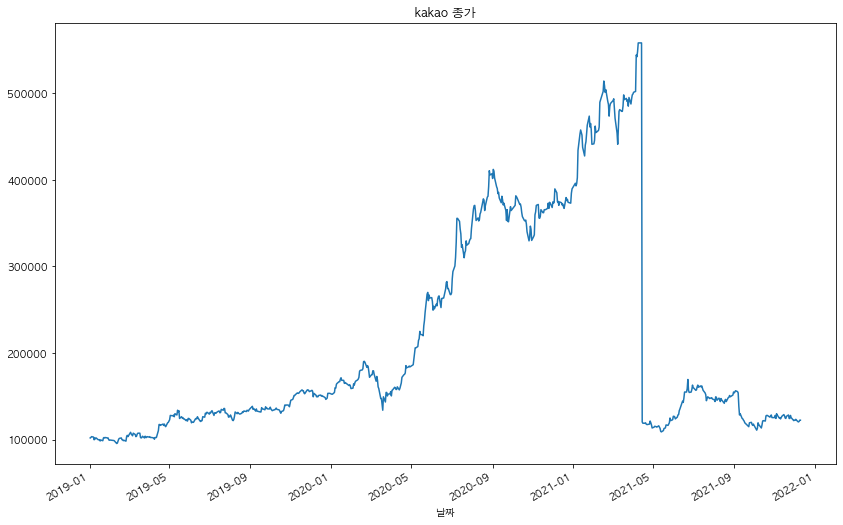

In [14]:
kakao_종가 = kakao['종가'].plot(title = "kakao 종가")
fig = kakao_종가.get_figure()
fig.set_size_inches(14, 9)

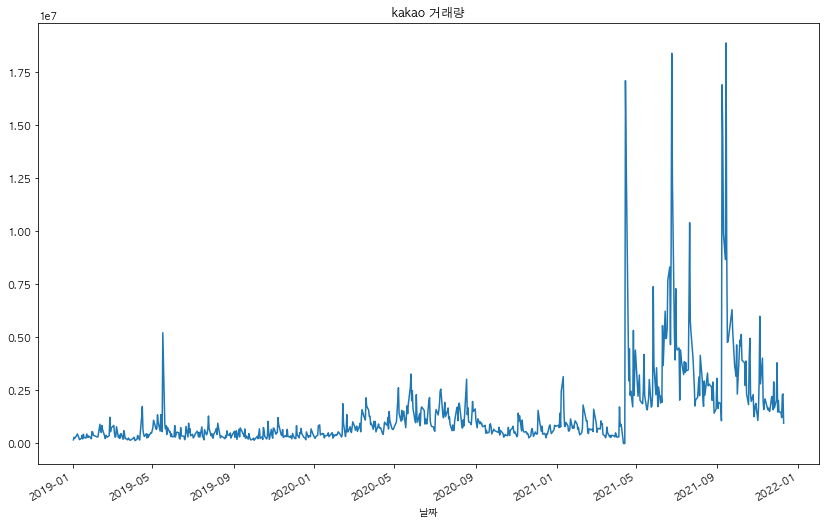

In [15]:
kakao_거래량 = kakao['거래량'].plot(title = "kakao 거래량")
fig = kakao_거래량.get_figure()
fig.set_size_inches(14, 9)

* 2021년 4월 15일에 카카오 주식 액면 분할을 한 것으로 확인 됨

In [16]:
str_datefrom_new = datetime.datetime.strftime(datetime.datetime(year=2021, month=4, day=15), '%Y.%m.%d')
str_datefrom_new

'2021.04.15'

In [17]:
kakao = None
for page in range(1, pg_last+1):
    _kakao = parse_page(code, page)
    _kakao_filtered = _kakao[_kakao['날짜'] > str_datefrom_new]
    if kakao is None:
        kakao = _kakao_filtered
    else:
        kakao = pd.concat([kakao, _kakao_filtered])
    if len(_kakao) > len(_kakao_filtered):
        break

In [18]:
kakao

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.12.10,122500.0,0.0,122000.0,122500.0,121000.0,957002.0
2,2021.12.09,122500.0,1500.0,120500.0,122500.0,120000.0,2338843.0
3,2021.12.08,121000.0,500.0,121500.0,123500.0,120500.0,2288195.0
4,2021.12.07,120500.0,500.0,121500.0,122000.0,120000.0,1218740.0
5,2021.12.06,121000.0,2500.0,122500.0,122500.0,120500.0,1477396.0
...,...,...,...,...,...,...,...
12,2021.04.22,117500.0,500.0,118000.0,119500.0,117500.0,2279180.0
13,2021.04.21,118000.0,1500.0,119500.0,119500.0,117000.0,4461636.0
1,2021.04.20,119500.0,500.0,119000.0,121000.0,118000.0,2952174.0
2,2021.04.19,119000.0,0.0,120000.0,122000.0,117500.0,5441693.0


In [19]:
kakao.날짜 = pd.to_datetime(kakao.날짜)
kakao = kakao.set_index('날짜')
kakao

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2021-12-10,122500.0,0.0,122000.0,122500.0,121000.0,957002.0
2021-12-09,122500.0,1500.0,120500.0,122500.0,120000.0,2338843.0
2021-12-08,121000.0,500.0,121500.0,123500.0,120500.0,2288195.0
2021-12-07,120500.0,500.0,121500.0,122000.0,120000.0,1218740.0
2021-12-06,121000.0,2500.0,122500.0,122500.0,120500.0,1477396.0
...,...,...,...,...,...,...
2021-04-22,117500.0,500.0,118000.0,119500.0,117500.0,2279180.0
2021-04-21,118000.0,1500.0,119500.0,119500.0,117000.0,4461636.0
2021-04-20,119500.0,500.0,119000.0,121000.0,118000.0,2952174.0


In [20]:
kakao.describe()

,종가,전일비,시가,고가,저가,거래량
count,163.000000,163.000000,163.000000,163.000000,163.000000,1.630000e+02
mean,133263.803681,2300.613497,133325.153374,135423.312883,131285.276074,3.759770e+06
std,15863.160296,2259.096753,16055.606857,16169.585726,15578.650448,3.015728e+06
min,109000.000000,0.000000,109000.000000,111000.000000,108000.000000,9.570020e+05
25%,120750.000000,1000.000000,121000.000000,122250.000000,118750.000000,1.988153e+06
50%,127000.000000,1500.000000,127000.000000,128500.000000,125000.000000,2.813914e+06
75%,148000.000000,3000.000000,148500.000000,149500.000000,145250.000000,4.410548e+06
max,169500.000000,15500.000000,172000.000000,173000.000000,161000.000000,1.889515e+07


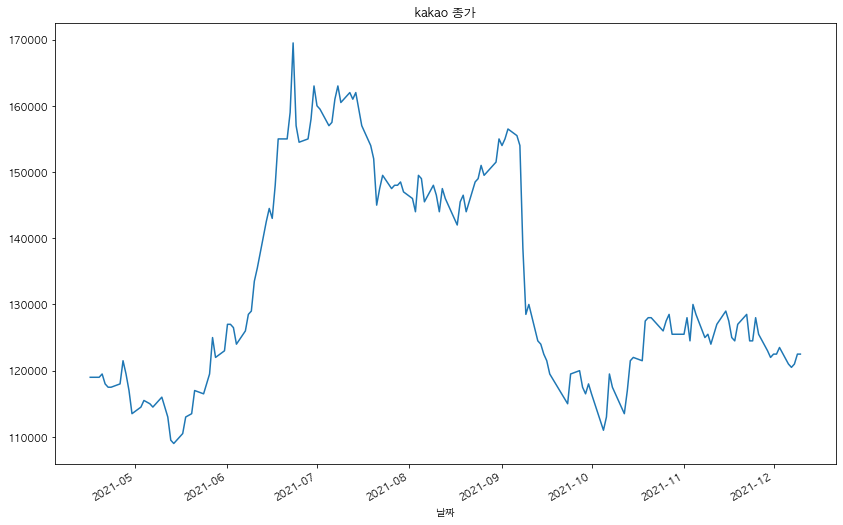

In [21]:
kakao_종가 = kakao['종가'].plot(title = "kakao 종가")
fig = kakao_종가.get_figure()
fig.set_size_inches(14, 9)

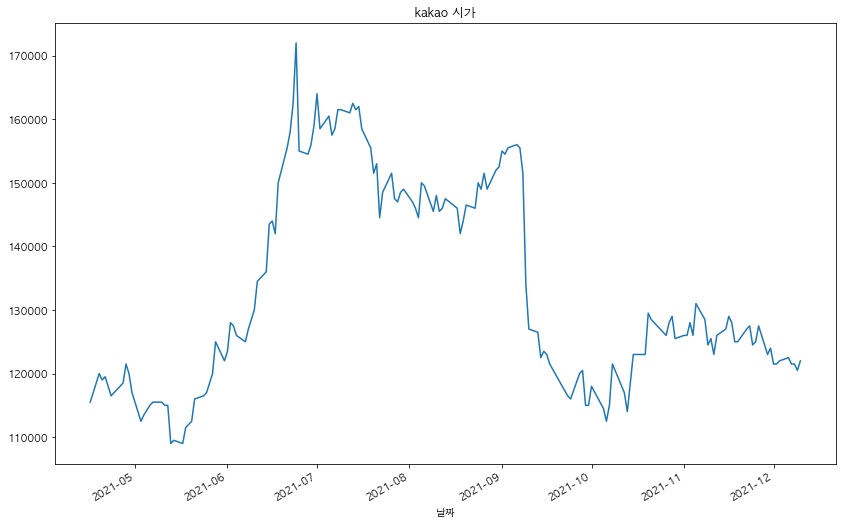

In [22]:
kakao_시가 = kakao['시가'].plot(title = "kakao 시가")
fig = kakao_시가.get_figure()
fig.set_size_inches(14, 9)

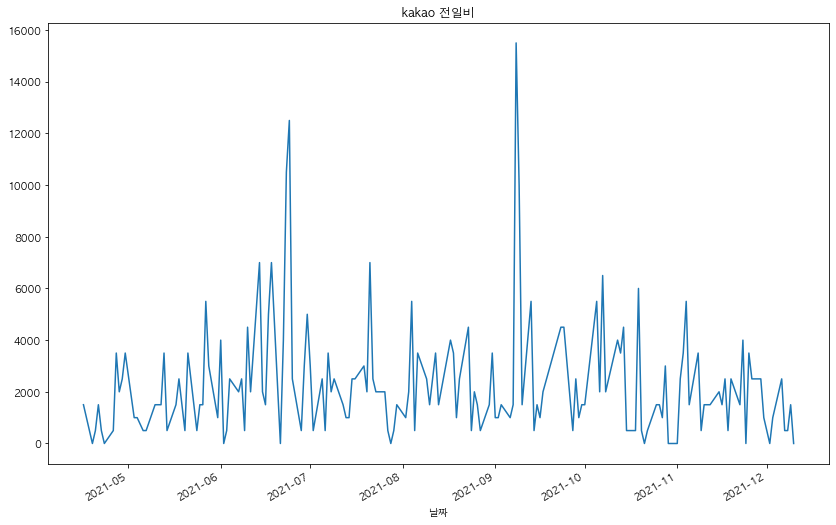

In [23]:
kakao_전일비 = kakao['전일비'].plot(title = "kakao 전일비")
fig = kakao_전일비.get_figure()
fig.set_size_inches(14, 9)

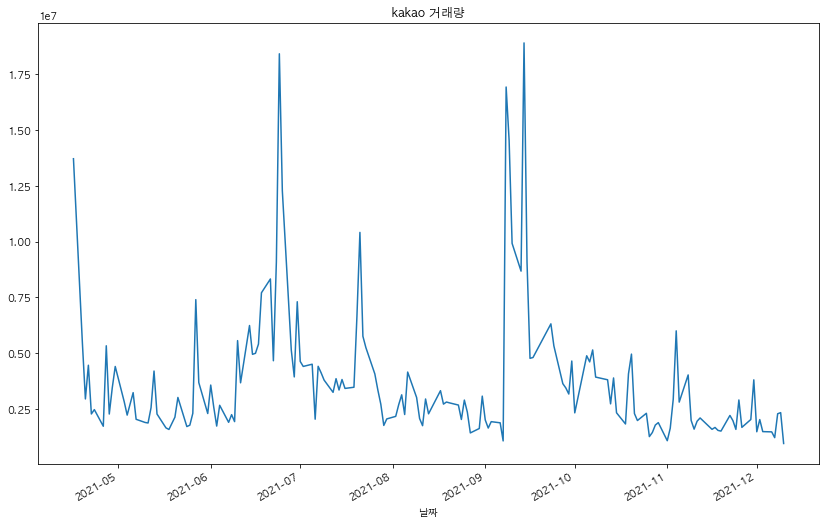

In [24]:
kakao_거래량 = kakao['거래량'].plot(title = "kakao 거래량")
fig = kakao_거래량.get_figure()
fig.set_size_inches(14, 9)

In [25]:
kakao.corr(method='pearson')

,종가,전일비,시가,고가,저가,거래량
종가,1.000000,0.173167,0.984036,0.991551,0.994860,0.160835
전일비,0.173167,1.000000,0.203894,0.232822,0.139882,0.606449
시가,0.984036,0.203894,1.000000,0.994432,0.991422,0.198156
고가,0.991551,0.232822,0.994432,1.000000,0.991355,0.231811
저가,0.994860,0.139882,0.991422,0.991355,1.000000,0.129906
거래량,0.160835,0.606449,0.198156,0.231811,0.129906,1.000000


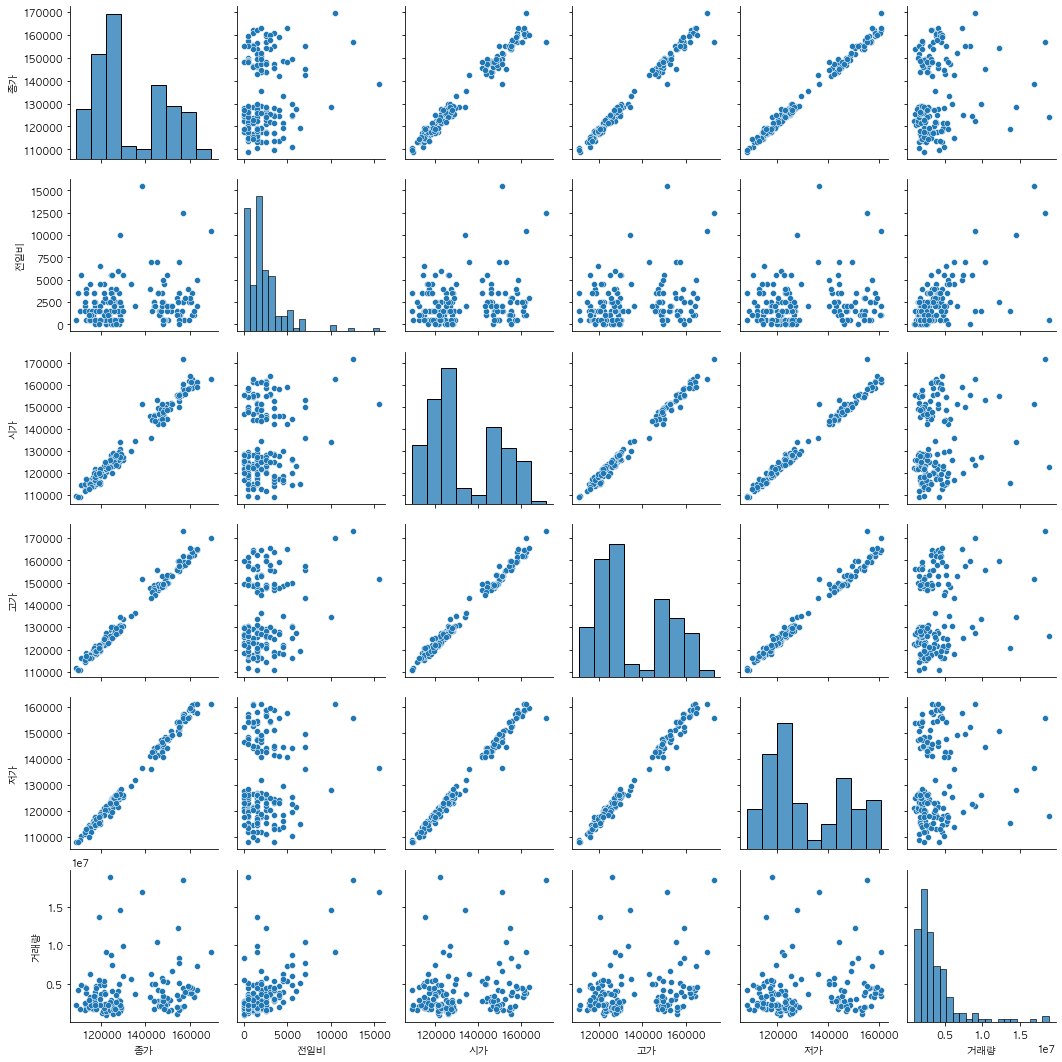

In [26]:
import seaborn as sns
sns.pairplot(kakao.iloc[:,:])

* 종가, 시가, 고가, 저가는 서로 강한 상관관계를 띔
* 전일비와 거래량도 어느 정도의 상관관계가 보임

/Users/sungahwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


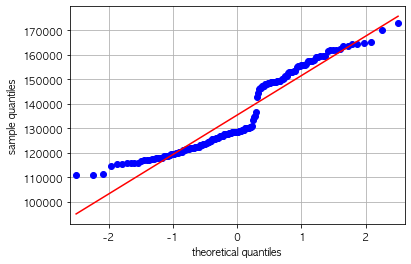

In [27]:
import statsmodels.api as sm
x = kakao.고가
sm.qqplot(x, marker = 'o', line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

/Users/sungahwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


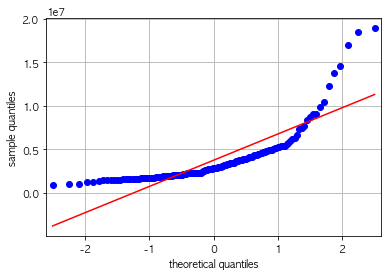

In [28]:
import statsmodels.api as sm
x = kakao.거래량
sm.qqplot(x, marker = 'o', line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

/Users/sungahwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


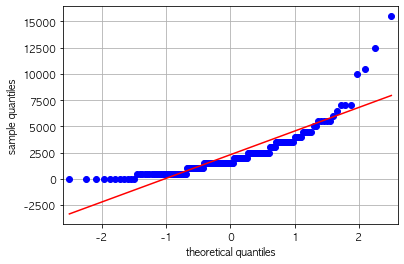

In [29]:
import statsmodels.api as sm
x = kakao.전일비
sm.qqplot(x, marker = 'o', line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

# 분석

## Linear Regression

### Linear Regression - 거래량, 전일비

In [30]:
x_train = kakao.거래량[1:100].values.reshape((-1,1))
y_train = kakao.전일비[1:100].values.reshape((-1,1))
x_test = kakao.거래량[100:].values.reshape((-1,1))
y_test = kakao.전일비[100:].values.reshape((-1,1))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(99, 1) (99, 1)
(63, 1) (63, 1)


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(x_train, y_train) 
print('직선의 기울기 : ', model.coef_) 
print('y 절편      : ', model.intercept_) 

직선의 기울기 :  [[0.00042993]]
y 절편      :  [789.87850338]


In [33]:
y_train_pred = model.predict(x_train) 
y_test_pred = model.predict(x_test) 

In [34]:
y_test_pred

array([[2432.99249494],
       [2231.0024111 ],
       [2449.28372367],
       [2186.30933632],
       [2421.67896251],
       [2561.71869658],
       [2687.3163185 ],
       [1669.14999188],
       [2727.54588982],
       [2684.8696032 ],
       [2780.56149397],
       [3930.74984362],
       [2483.16456106],
       [3000.3097179 ],
       [6065.70606072],
       [8704.06094463],
       [4693.09963968],
       [2794.21683947],
       [4368.9995028 ],
       [4103.04529052],
       [3115.30662659],
       [2937.91138407],
       [2918.15924194],
       [3472.79318465],
       [2369.60274914],
       [3181.99778281],
       [1622.53858225],
       [1756.515054  ],
       [1608.97481123],
       [1937.03328719],
       [1536.86227389],
       [1906.59100698],
       [2326.35551929],
       [1778.43488871],
       [2374.51251696],
       [3970.79411634],
       [1782.32443946],
       [1553.85944297],
       [1527.33594855],
       [2087.6341812 ],
       [1707.81634815],
       [1471.614

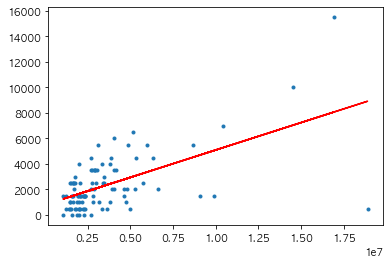

In [35]:
plt.plot(x_train.reshape((-1,)), y_train, '.');
plt.plot(x_train.reshape((-1,)), y_train_pred, '-r');

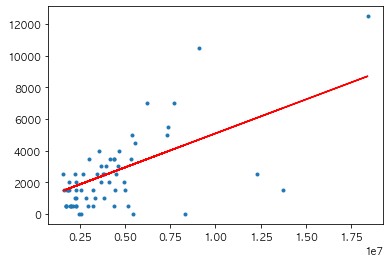

In [36]:
plt.plot(x_test.reshape((-1,)), y_test, '.');
plt.plot(x_test.reshape((-1,)), y_test_pred, '-r');

### Linear Regression - 저가, 고가

In [37]:
x_train = kakao.저가[1:100].values.reshape((-1,1))
y_train = kakao.고가[1:100].values.reshape((-1,1))
x_test = kakao.저가[100:].values.reshape((-1,1))
y_test = kakao.고가[100:].values.reshape((-1,1))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(99, 1) (99, 1)
(63, 1) (63, 1)


In [38]:
model = LinearRegression()  
model.fit(x_train, y_train) 
print('직선의 기울기 : ', model.coef_) 
print('y 절편      : ', model.intercept_) 

직선의 기울기 :  [[0.99701133]]
y 절편      :  [4453.01267124]


In [39]:
y_train_pred = model.predict(x_train) 
y_test_pred = model.predict(x_test) 

In [40]:
y_test_pred

array([[162479.30814143],
       [164971.83646115],
       [164473.3307972 ],
       [161980.80247748],
       [162479.30814143],
       [164971.83646115],
       [162479.30814143],
       [160983.7911496 ],
       [160485.28548565],
       [159986.77982171],
       [163476.31946931],
       [161482.29681354],
       [158491.26282988],
       [157992.75716593],
       [154503.21751833],
       [159488.27415776],
       [164971.83646115],
       [159488.27415776],
       [155998.73451016],
       [153506.20619044],
       [144533.10423945],
       [146527.12689523],
       [144533.10423945],
       [140046.55326396],
       [136058.50795241],
       [133565.97963269],
       [132568.9683048 ],
       [130574.94564902],
       [129079.42865719],
       [127085.40600142],
       [130076.43998508],
       [130076.43998508],
       [127085.40600142],
       [124592.8776817 ],
       [124592.8776817 ],
       [123595.86635381],
       [121601.84369804],
       [120106.3267062 ],
       [1196

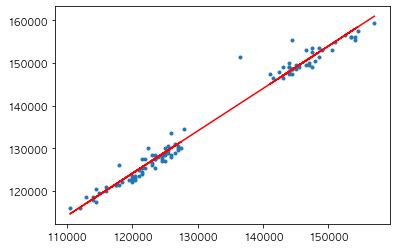

In [41]:
plt.plot(x_train.reshape((-1,)), y_train, '.');
plt.plot(x_train.reshape((-1,)), y_train_pred, '-r');

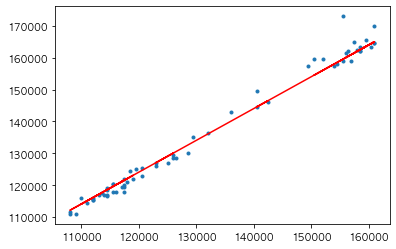

In [42]:
plt.plot(x_test.reshape((-1,)), y_test, '.');
plt.plot(x_test.reshape((-1,)), y_test_pred, '-r');

## Two sample Test

In [43]:
kakao

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2021-12-10,122500.0,0.0,122000.0,122500.0,121000.0,957002.0
2021-12-09,122500.0,1500.0,120500.0,122500.0,120000.0,2338843.0
2021-12-08,121000.0,500.0,121500.0,123500.0,120500.0,2288195.0
2021-12-07,120500.0,500.0,121500.0,122000.0,120000.0,1218740.0
2021-12-06,121000.0,2500.0,122500.0,122500.0,120500.0,1477396.0
...,...,...,...,...,...,...
2021-04-22,117500.0,500.0,118000.0,119500.0,117500.0,2279180.0
2021-04-21,118000.0,1500.0,119500.0,119500.0,117000.0,4461636.0
2021-04-20,119500.0,500.0,119000.0,121000.0,118000.0,2952174.0


In [44]:
code = '035420'  # naver

url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
res = requests.get(url, headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36'})
res.encoding = 'utf-8'
res.status_code

soup = BeautifulSoup(res.text, 'lxml')

el_table_navi = soup.find("table", class_="Nnavi")
el_td_last = el_table_navi.find("td", class_="pgRR")
pg_last = el_td_last.a.get('href').rsplit('&')[1]
pg_last = pg_last.split('=')[1]
pg_last = int(pg_last)
pg_last

def parse_page(code, page):
    try:
        url = 'http://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
        res = requests.get(url, headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36'})
        _soap = BeautifulSoup(res.text, 'lxml')
        _naver = pd.read_html(str(_soap.find("table")), header=0)[0]
        _naver = _naver.dropna()
        return _naver
    except Exception as e:
        traceback.print_exc()
    return None

str_datefrom_new = datetime.datetime.strftime(datetime.datetime(year=2021, month=4, day=15), '%Y.%m.%d')

naver = None
for page in range(1, pg_last+1):
    _naver = parse_page(code, page)
    _naver_filtered = _naver[_naver['날짜'] > str_datefrom_new]
    if naver is None:
        naver = _naver_filtered
    else:
        naver = pd.concat([naver, _naver_filtered])
    if len(_naver) > len(_naver_filtered):
        break

In [45]:
naver

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.12.10,395000.0,4500.0,394000.0,396500.0,393500.0,219062.0
2,2021.12.09,399500.0,4500.0,397000.0,399500.0,394000.0,748143.0
3,2021.12.08,395000.0,4000.0,395000.0,399500.0,394000.0,534080.0
4,2021.12.07,391000.0,1000.0,390500.0,392500.0,388500.0,384366.0
5,2021.12.06,392000.0,10000.0,400500.0,400500.0,389500.0,456773.0
...,...,...,...,...,...,...,...
12,2021.04.22,380500.0,0.0,382000.0,384500.0,380000.0,394350.0
13,2021.04.21,380500.0,10500.0,389000.0,389000.0,380500.0,835828.0
1,2021.04.20,391000.0,1000.0,389000.0,391500.0,387500.0,417892.0
2,2021.04.19,390000.0,1500.0,391500.0,393500.0,388500.0,449064.0


In [46]:
naver.날짜 = pd.to_datetime(naver.날짜)
naver = naver.set_index('날짜')
naver

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2021-12-10,395000.0,4500.0,394000.0,396500.0,393500.0,219062.0
2021-12-09,399500.0,4500.0,397000.0,399500.0,394000.0,748143.0
2021-12-08,395000.0,4000.0,395000.0,399500.0,394000.0,534080.0
2021-12-07,391000.0,1000.0,390500.0,392500.0,388500.0,384366.0
2021-12-06,392000.0,10000.0,400500.0,400500.0,389500.0,456773.0
...,...,...,...,...,...,...
2021-04-22,380500.0,0.0,382000.0,384500.0,380000.0,394350.0
2021-04-21,380500.0,10500.0,389000.0,389000.0,380500.0,835828.0
2021-04-20,391000.0,1000.0,389000.0,391500.0,387500.0,417892.0


In [47]:
test = pd.concat([kakao.거래량, naver.거래량], axis = 1, keys = ['kakao', 'naver'])
test

,kakao,naver
날짜,,
2021-12-10,957002.0,219062.0
2021-12-09,2338843.0,748143.0
2021-12-08,2288195.0,534080.0
2021-12-07,1218740.0,384366.0
2021-12-06,1477396.0,456773.0
...,...,...
2021-04-22,2279180.0,394350.0
2021-04-21,4461636.0,835828.0
2021-04-20,2952174.0,417892.0


In [48]:
from scipy import stats
stat, pval = stats.ttest_ind(test.kakao, test.naver, equal_var=False, alternative='greater')
stat, pval

(12.93367533259652, 2.800047093745117e-27)